In [1]:
import netCDF4

In [2]:
import xarray as xr
import s3fs

def loadData(zarrDir):
    fs = s3fs.S3FileSystem(anon=True)
    zarr_store = fs.get_mapper(zarrDir)
    ds = xr.open_zarr(zarr_store, consolidated=True)
    return ds

#zarrFile = 'ooi-data/CE04OSPS-SF01B-2A-CTDPFA107-streamed-ctdpf_sbe43_sample'
#zarrFile = 'ooi-data/RS01SBPS-SF01A-2A-CTDPFA102-streamed-ctdpf_sbe43_sample'
zarrFile = 'ooi-data/RS03AXPS-SF03A-2A-CTDPFA302-streamed-ctdpf_sbe43_sample'

In [3]:
fs = s3fs.S3FileSystem(anon=True)

In [4]:
streamlist = fs.listdir('ooi-data', detail = False)

def InstrumentBreakout(s):
    print('Field breakout:', s[9:11], s[11:13], s[13:15], s[15:17], s[18:20], s[20:22], s[22:23], s[24:26], \
          s[27:32], s[32:33], s[33:36], s[46:])

stream_choice = 15
print()
print('Full stream name:', streamlist[stream_choice])
print()
InstrumentBreakout(streamlist[stream_choice])
print()
print('The first field has CE for Coastal Endurance or RS for Regional Cabled Array.')
print('Fields 5, 6 and 7 give us shallow profiler site and choice of profiler or platform.')
print()
indenter = 4
print(' '*indenter + 'PC 01 B --> Oregon Offshore 200m Platform')
print(' '*indenter + 'SF 01 B --> Oregon Offshore Profiler')
print(' '*indenter + 'SF 01 A --> Oregon Slope Base Profiler')
print(' '*indenter + 'PC 03 A --> Axial Base 200m Platform')
print(' '*indenter + 'SF 03 A --> Axial Base Profiler')
print()
print('Non-shallow-profiler examples:')
print('  DP O3 A is the Axial Base Deep Profiler')
print('  LJ 01 A is the Oregon Slope Base Seafloor')
print()


Full stream name: ooi-data/CE04OSPS-SF01B-2A-CTDPFA107-streamed-ctdpf_sbe43_sample

Field breakout: CE 04 OS PS SF 01 B 2A CTDPF A 107 ctdpf_sbe43_sample

The first field has CE for Coastal Endurance or RS for Regional Cabled Array.
Fields 5, 6 and 7 give us shallow profiler site and choice of profiler or platform.

    PC 01 B --> Oregon Offshore 200m Platform
    SF 01 B --> Oregon Offshore Profiler
    SF 01 A --> Oregon Slope Base Profiler
    PC 03 A --> Axial Base 200m Platform
    SF 03 A --> Axial Base Profiler

Non-shallow-profiler examples:
  DP O3 A is the Axial Base Deep Profiler
  LJ 01 A is the Oregon Slope Base Seafloor



In [5]:
osb_profiler_streams = [sname for sname in streamlist if 'SF01A' in sname]
for s in osb_profiler_streams: 
    print(s)
    if 'ctdpf' in s: osb_sp_ctd = s
print()
print(osb_sp_ctd)
print()

ooi-data/RS01SBPS-SF01A-2A-CTDPFA102-streamed-ctdpf_sbe43_sample
ooi-data/RS01SBPS-SF01A-2D-PHSENA101-streamed-phsen_data_record
ooi-data/RS01SBPS-SF01A-3A-FLORTD101-streamed-flort_d_data_record
ooi-data/RS01SBPS-SF01A-3B-OPTAAD101-streamed-optaa_sample
ooi-data/RS01SBPS-SF01A-3C-PARADA101-streamed-parad_sa_sample
ooi-data/RS01SBPS-SF01A-3D-SPKIRA101-streamed-spkir_data_record
ooi-data/RS01SBPS-SF01A-4A-NUTNRA101-streamed-nutnr_a_dark_sample
ooi-data/RS01SBPS-SF01A-4A-NUTNRA101-streamed-nutnr_a_sample
ooi-data/RS01SBPS-SF01A-4B-VELPTD102-streamed-velpt_velocity_data
ooi-data/RS01SBPS-SF01A-4F-PCO2WA101-streamed-pco2w_a_sami_data_record

ooi-data/RS01SBPS-SF01A-2A-CTDPFA102-streamed-ctdpf_sbe43_sample



In [6]:
# use ds.sel( to narrow the time window dim

In [7]:
siteData = loadData(osb_sp_ctd)
siteData

<xarray.Dataset>
Dimensions:                                            (time: 220548447)
Coordinates:
  * time                                               (time) datetime64[ns] ...
Data variables: (12/39)
    conductivity                                       (time) float64 dask.array<chunksize=(12000000,), meta=np.ndarray>
    corrected_dissolved_oxygen                         (time) float64 dask.array<chunksize=(12000000,), meta=np.ndarray>
    corrected_dissolved_oxygen_qartod_executed         (time) <U2 dask.array<chunksize=(12000000,), meta=np.ndarray>
    corrected_dissolved_oxygen_qartod_results          (time) uint8 dask.array<chunksize=(100000000,), meta=np.ndarray>
    corrected_dissolved_oxygen_qc_executed             (time) uint8 dask.array<chunksize=(100000000,), meta=np.ndarray>
    corrected_dissolved_oxygen_qc_results              (time) uint8 dask.array<chunksize=(100000000,), meta=np.ndarray>
    ...                                                 ...
    sea_water_temperature                              (time) float64 dask.array<chunksize=(12000000,), meta=np.ndarray>
    sea_water_temperature_qartod_executed              (time) <U2 dask.array<chunksize=(12000000,), meta=np.ndarray>
    sea_water_temperature_qartod_results               (time) uint8 dask.array<chunksize=(100000000,), meta=np.ndarray>
    sea_water_temperature_qc_executed                  (time) uint8 dask.array<chunksize=(100000000,), meta=np.ndarray>
    sea_water_temperature_qc_results                   (time) uint8 dask.array<chunksize=(100000000,), meta=np.ndarray>
    temperature                                        (time) float64 dask.array<chunksize=(12000000,), meta=np.ndarray>
Attributes: (12/62)
    AssetManagementRecordLastModified:  2024-06-27T13:16:21.544000
    AssetUniqueID:                      ATAPL-66662-00008
    Conventions:                        CF-1.6
    Description:                        CTD Profiler: CTDPF Series A
    FirmwareVersion:                    Not specified.
    Manufacturer:                       Sea-Bird Electronics
    ...                                 ...
    stream:                             ctdpf_sbe43_sample
    subsite:                            RS01SBPS
    summary:                            Dataset Generated by Stream Engine fr...
    time_coverage_end:                  2024-06-28T11:13:24.862212608
    time_coverage_start:                2014-10-06T22:05:23.269171200
    title:                              Data produced by Stream Engine versio...

In [8]:
siteData.time[-1]

<xarray.DataArray 'time' ()>
array('2024-06-28T11:13:24.862212608', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2024-06-28T11:13:24.862212608
Attributes:
    axis:           T
    long_name:      time
    standard_name:  time

In [9]:
t0, t1 = '2022-01-01T00', '2022-01-31T23'
ds = siteData.sel(time=slice(t0, t1))
ds.time[0], ds.time[-1]

(<xarray.DataArray 'time' ()>
 array('2022-01-01T00:00:00.097717760', dtype='datetime64[ns]')
 Coordinates:
     time     datetime64[ns] 2022-01-01T00:00:00.097717760
 Attributes:
     axis:           T
     long_name:      time
     standard_name:  time,
 <xarray.DataArray 'time' ()>
 array('2022-01-31T23:59:59.066327552', dtype='datetime64[ns]')
 Coordinates:
     time     datetime64[ns] 2022-01-31T23:59:59.066327552
 Attributes:
     axis:           T
     long_name:      time
     standard_name:  time)

In [10]:
type(ds)

xarray.core.dataset.Dataset

In [11]:
# only do this after a .sel on time range etcetera
# siteData.to_netcdf("~/RS03AXPS-SF03A-2A-CTDPFA302-streamed-ctdpf_sbe43_sample.nc")

In [12]:
ds

<xarray.Dataset>
Dimensions:                                            (time: 2678084)
Coordinates:
  * time                                               (time) datetime64[ns] ...
Data variables: (12/39)
    conductivity                                       (time) float64 dask.array<chunksize=(2678084,), meta=np.ndarray>
    corrected_dissolved_oxygen                         (time) float64 dask.array<chunksize=(2678084,), meta=np.ndarray>
    corrected_dissolved_oxygen_qartod_executed         (time) <U2 dask.array<chunksize=(2678084,), meta=np.ndarray>
    corrected_dissolved_oxygen_qartod_results          (time) uint8 dask.array<chunksize=(2678084,), meta=np.ndarray>
    corrected_dissolved_oxygen_qc_executed             (time) uint8 dask.array<chunksize=(2678084,), meta=np.ndarray>
    corrected_dissolved_oxygen_qc_results              (time) uint8 dask.array<chunksize=(2678084,), meta=np.ndarray>
    ...                                                 ...
    sea_water_temperature                              (time) float64 dask.array<chunksize=(2678084,), meta=np.ndarray>
    sea_water_temperature_qartod_executed              (time) <U2 dask.array<chunksize=(2678084,), meta=np.ndarray>
    sea_water_temperature_qartod_results               (time) uint8 dask.array<chunksize=(2678084,), meta=np.ndarray>
    sea_water_temperature_qc_executed                  (time) uint8 dask.array<chunksize=(2678084,), meta=np.ndarray>
    sea_water_temperature_qc_results                   (time) uint8 dask.array<chunksize=(2678084,), meta=np.ndarray>
    temperature                                        (time) float64 dask.array<chunksize=(2678084,), meta=np.ndarray>
Attributes: (12/62)
    AssetManagementRecordLastModified:  2024-06-27T13:16:21.544000
    AssetUniqueID:                      ATAPL-66662-00008
    Conventions:                        CF-1.6
    Description:                        CTD Profiler: CTDPF Series A
    FirmwareVersion:                    Not specified.
    Manufacturer:                       Sea-Bird Electronics
    ...                                 ...
    stream:                             ctdpf_sbe43_sample
    subsite:                            RS01SBPS
    summary:                            Dataset Generated by Stream Engine fr...
    time_coverage_end:                  2024-06-28T11:13:24.862212608
    time_coverage_start:                2014-10-06T22:05:23.269171200
    title:                              Data produced by Stream Engine versio...

In [13]:
type(ds.pressure)

xarray.core.dataarray.DataArray

In [14]:
from shallowprofiler import *
from charts import *

profiles = ReadProfileMetadata()    # this is an error: Hardcoded for Jan 2022

# Start with CTD temperature and salinity
how_many_charts = 3

# quick check: use d['temperature'].z.plot()
profile_list = [n for n in range(how_many_charts)]


Jupyter Notebook running Python 3


In [15]:
# This cell assembles a data dictionary "d" from the old-style datasets (that live within the repo)

d = {}

relative_path = 'rca/sensors/data/'
sitestring = 'osb'                    # available: osb = Oregon Slope Base
monthstring = 'jan22'                 # available: apr21, jul21, jan22

# error: apr21 and jul21 seem to fail on pCO2 despite data files present

def AssembleDataFilename(relative_path, site, instrument, time, sensor): 
    return relative_path + site + '_' + instrument + '_' + time + '_' + sensor + '.nc'

def GetSensorTuple(s, f):
    '''
    s is the sensor identifier string like 'temperature'
    f is the source filename like './../data/osb_ctd_jan22_temperature.nc' 
    '''
    df_sensor    = xr.open_dataset(f)[s]
    df_z         = xr.open_dataset(f)['z']
    range_lo     = ranges[s][0]
    range_hi     = ranges[s][1]
    sensor_color = colors[s]
    return (df_sensor, df_z, range_lo, range_hi, sensor_color)


for sensor in sensors:          # sensor is a list of 2 strings [sensor_str, instrument_str]
    f = AssembleDataFilename(relative_path, sitestring, sensor[1], monthstring, sensor[0])
    d[sensor[0]] = GetSensorTuple(sensor[0], f)

Attempting 3 charts



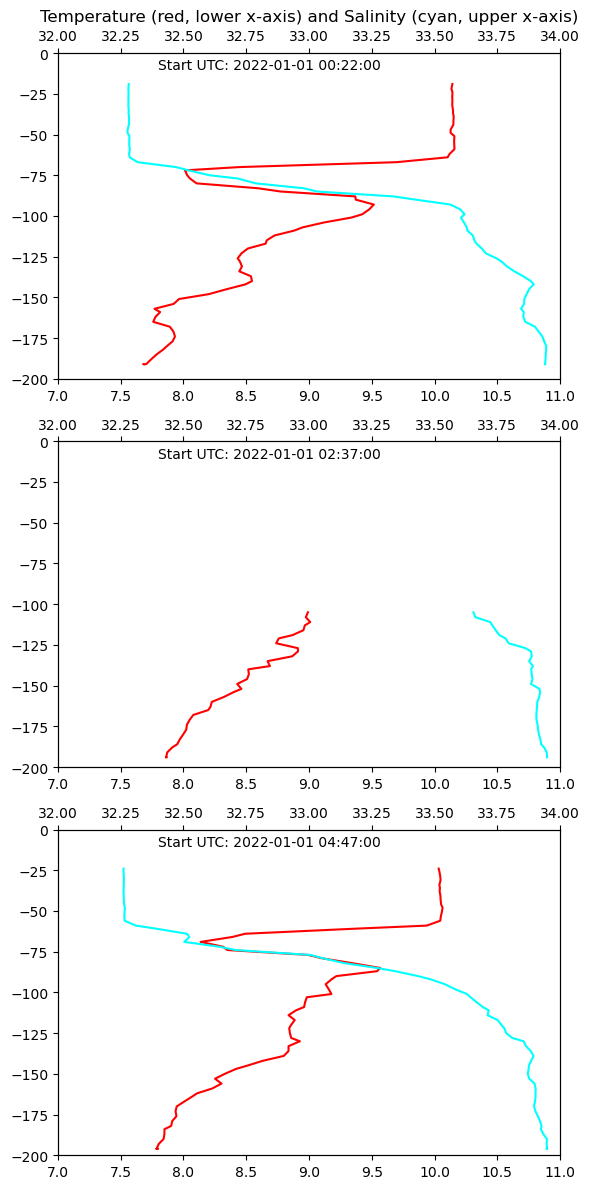

In [16]:
# temperature and salinity
fig,axs = ChartTwoSensors(profiles, [ranges['temperature'], ranges['salinity']], profile_list, 
                          d['temperature'][0], d['temperature'][1], 'Temperature', colors['temperature'],    'ascent',
                          d['salinity'][0],       d['salinity'][1],    'Salinity',  colors['salinity'], 'ascent', 6, 4)

Attempting 3 charts



(<Figure size 800x1800 with 3 Axes>,
 array([<Axes: title={'center': 'temperature (red)'}>, <Axes: >, <Axes: >],
       dtype=object))

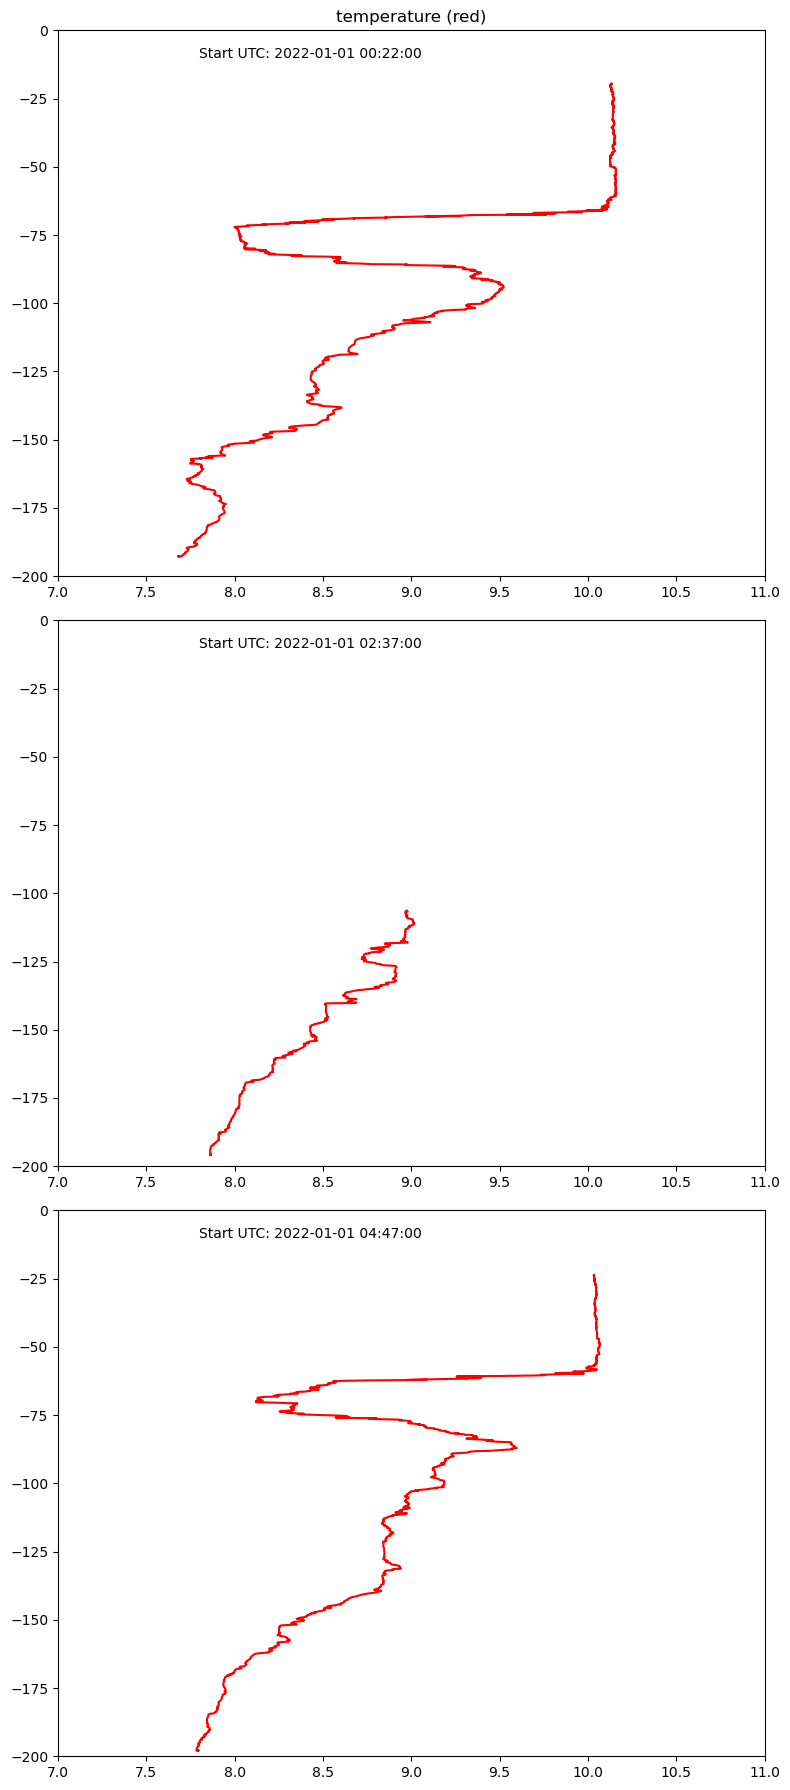

In [25]:
ChartSensor(profiles, [7., 11.], [0, 1, 2], ds.sea_water_temperature, -ds.sea_water_pressure, 'temperature', 'red', 'ascent', 8, 6)

Attempting 3 charts



(<Figure size 800x1800 with 3 Axes>,
 array([<Axes: title={'center': 'temperature (red)'}>, <Axes: >, <Axes: >],
       dtype=object))

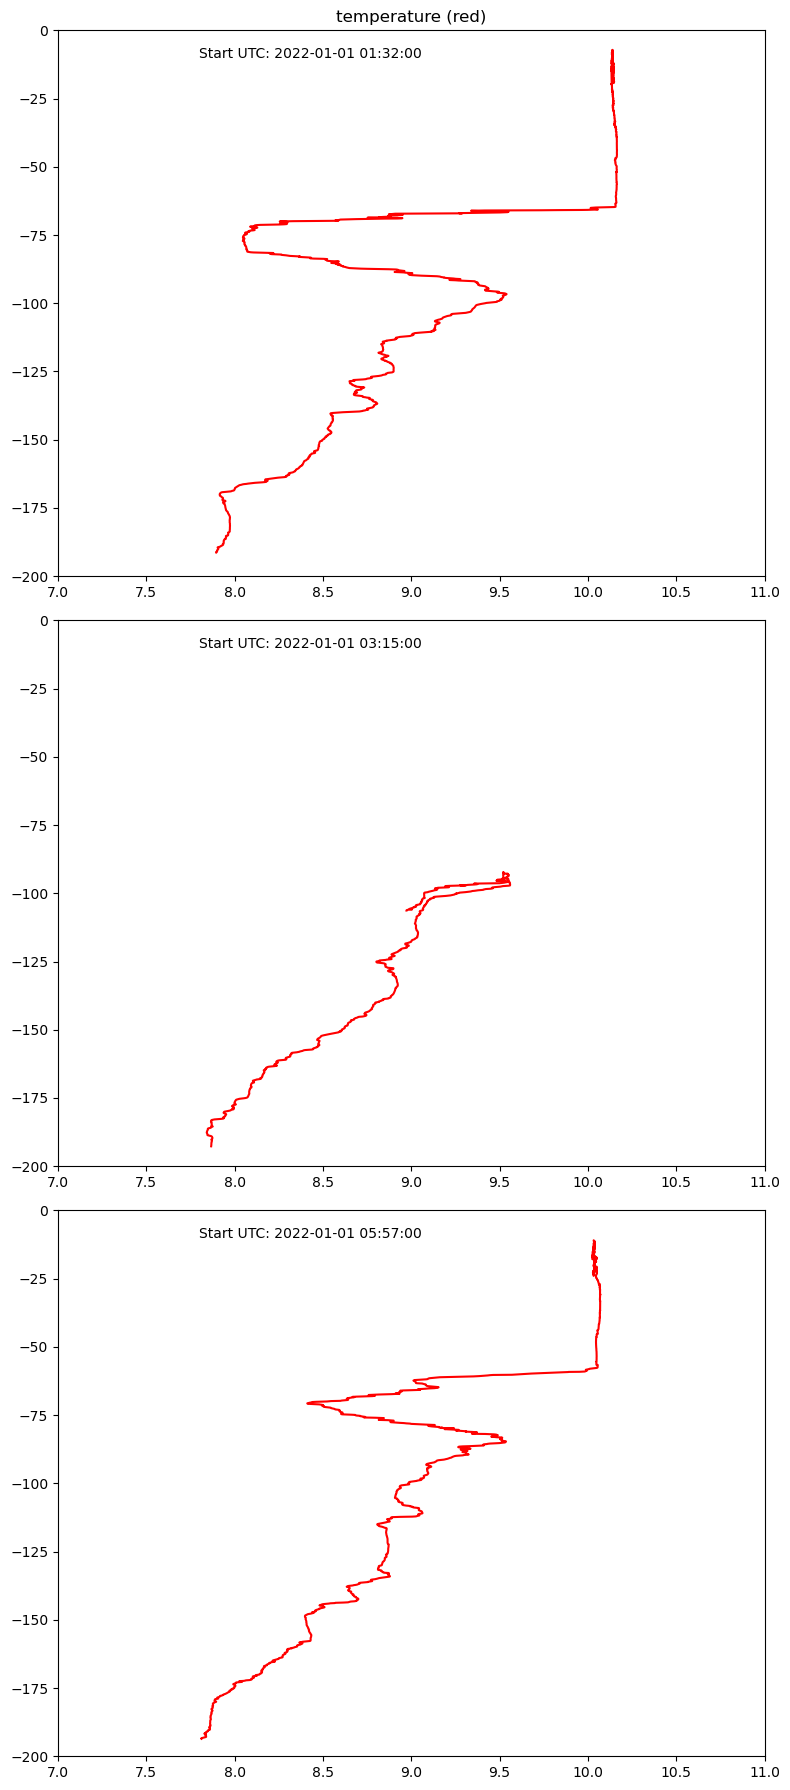

In [26]:
ChartSensor(profiles, [7., 11.], [0, 1, 2], ds.sea_water_temperature, -ds.sea_water_pressure, 'temperature', 'red', 'descent', 8, 6)

Attempting 3 charts



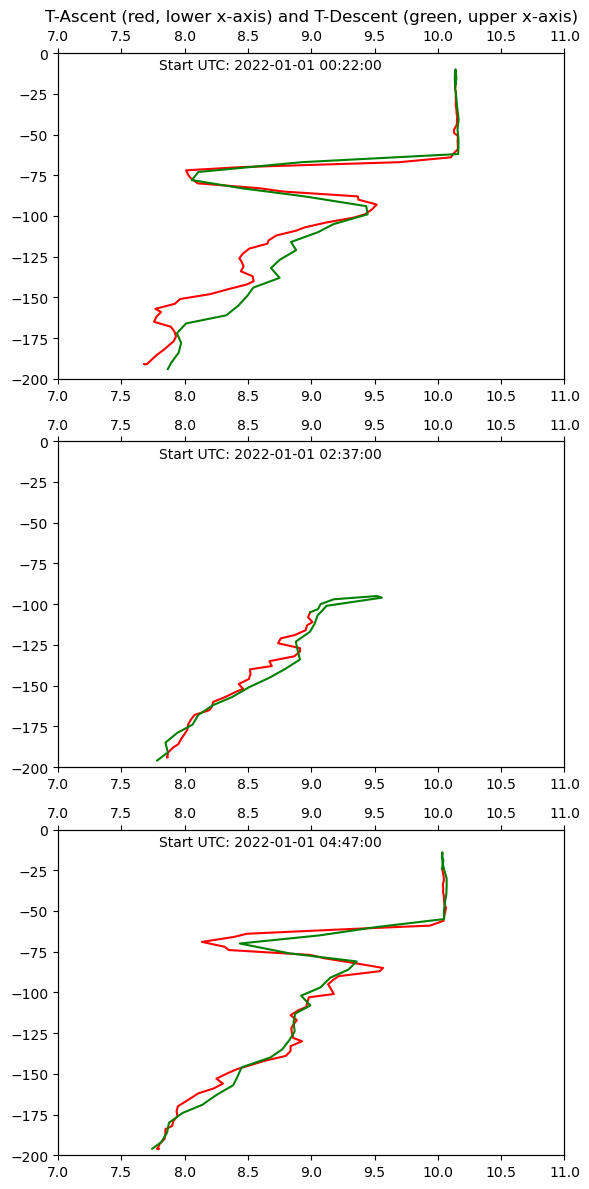

In [27]:
# temperature: ascent versus descent
fig,axs = ChartTwoSensors(profiles, [ranges['temperature'], ranges['temperature']], [0, 1, 2], 
                          d['temperature'][0], d['temperature'][1], 'T-Ascent',   colors['temperature'],    'ascent',
                          d['temperature'][0], d['temperature'][1], 'T-Descent',  'green',                  'descent', 6, 4)

Attempting 3 charts



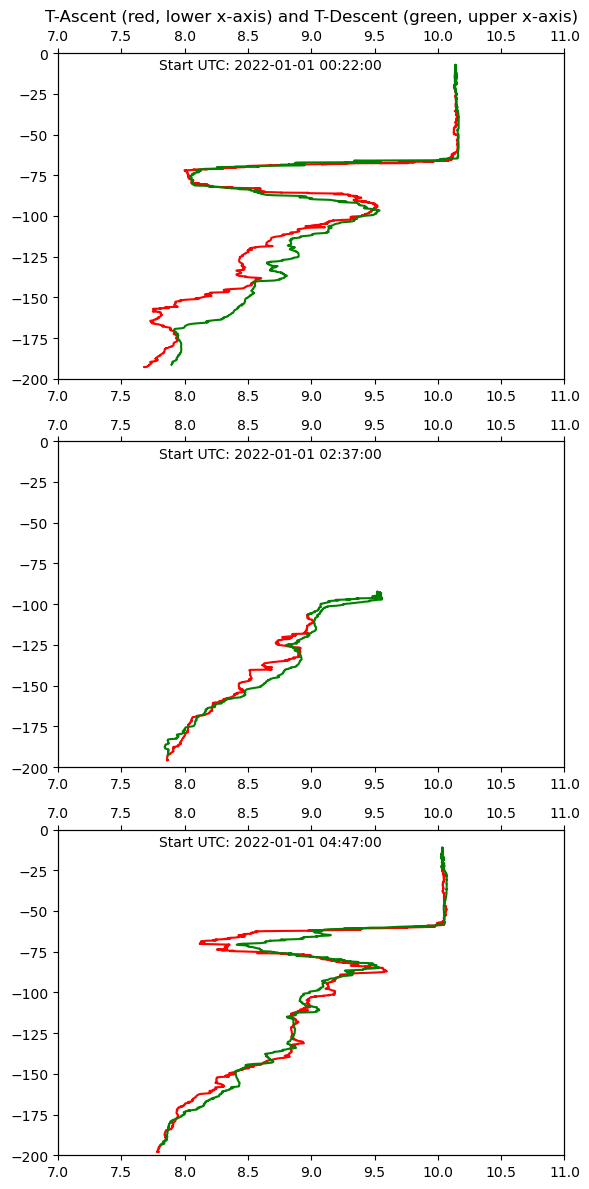

In [28]:
# temperature: ascent versus descent
fig,axs = ChartTwoSensors(profiles, [ranges['temperature'], ranges['temperature']], [0, 1, 2], 
                          ds.sea_water_temperature, -ds.sea_water_pressure,
                          'T-Ascent',   colors['temperature'],    'ascent',
                          ds.sea_water_temperature, -ds.sea_water_pressure,
                          'T-Descent',  'green',                  'descent', 6, 4)